In [16]:
# standard imports:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Getting data to be used with ML model:
* Three main things to do:
-> Split the data into features and labels (Usually 'X' and 'y')
-> Filling (also called imputing) or disregarding missing values
-> Converting non-numerical values to numerical values (also called feature encoding)

In [17]:
# import dataset:
heart_disease = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Matplotlib/heart-disease.csv")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
# Split data into training and test_sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [22]:
X.shape[0] * 0.8

242.4

In [23]:
len(heart_disease)

303

## Getting Data Ready:
## Convert Data to Numbers

In [24]:
car_sales = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Scikit-Learn/car-sales-extended.csv")

In [25]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [11]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [12]:
len(car_sales)

1000

In [13]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [57]:
# split the data (X/y)

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
# build the machine learning model:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [59]:
# turn the categories into numbers:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one-hot", one_hot, categorical_features)],
                                remainder="passthrough")

transformered_X = transformer.fit_transform(X)
transformered_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [60]:
pd.DataFrame(transformered_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [61]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [62]:
# method02 using dummies in pandas
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [63]:
# let's refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformered_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
model.score(X_test, y_test)

0.3235867221569877

## Handling missing values with Pandas

## what if there were missing values?

1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether.

In [65]:
# import car sales missing data:
car_sales_missing = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Scikit-Learn/car-sales-extended-missing.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [66]:
car_sales_missing.isna()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [67]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [68]:
# create X and y:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [69]:
# convert our data to numbers:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features_miss = ["Make", "Colour", "Doors"]

one_hot_miss = OneHotEncoder()

transformer_miss = ColumnTransformer([("one-hot", one_hot_miss, categorical_features_miss)],
                                     remainder="passthrough")

transformered_X_miss = transformer_miss.fit_transform(X)
transformered_X_miss

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [70]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


# Method-1: Fill missing data with Pandas

In [71]:
# fill the "make" column:
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column:
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column:
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column:
car_sales_missing["Doors"].fillna(4, inplace=True)

In [72]:
# check our dataframe again:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

# we are trying to predict the price col so we leave it unchanged:

In [73]:
# remove the rows with missing Price value:
car_sales_missing.dropna(inplace=True)

In [74]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [75]:
len(car_sales_missing)

950

In [76]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features_miss = ["Make", "Colour", "Doors"]

one_hot_miss = OneHotEncoder()

transformer_miss = ColumnTransformer([("one-hot", one_hot_miss, categorical_features_miss)],
                                     remainder="passthrough")

transformered_X_miss = transformer_miss.fit_transform(car_sales_missing)
transformered_X_miss

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# Method-2: Fill missing data using Scikit-learn

In [78]:
car_sales_missing = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Scikit-Learn/car-sales-extended-missing.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [79]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [80]:
# drop the rows with no labels:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [81]:
# split into X and y:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [82]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [83]:
# Fill missing values with Scikit learn:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean:
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns:
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create and imputer (something that fills the missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data:
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [84]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [85]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [86]:
# converting our data into numbers:

categorical_features_filled = ["Make", "Colour", "Doors"]
one_hot_filled = OneHotEncoder()
transformer_filled = ColumnTransformer([
    ("one_hot_filled", one_hot_filled, categorical_features_filled)],
    remainder = "passthrough"
)

transformed_X_fill = transformer_filled.fit_transform(car_sales_filled)
transformed_X_fill

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

# now we have got our data as numbers and filled (no missing values)
# lets fit a model:

In [87]:
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X_fill,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=1000)  # default value is 100

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2207424090369795

In [88]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for your problem:

Note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Estimators have classifiers and Regressors.
* Classification Problem: predicting a category (heart disease or not).
    * sometimes we see `clf` (short for classifier) used as a classification estimator
* Regression Problem: predicting a number (selling price of car)

## 2.1 Picking a ml model for a regression problem:
California Housing Dataset

In [89]:
# Get california housing dataset:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [90]:
housing_df = pd.DataFrame(housing["data"])
housing_df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [91]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [92]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

# we will be predicting medHouseVal (Median House Value)
# house value = median house value * 100,000 (in california) ($)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [93]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [94]:
# drop the MedValCol:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Ridge Regression Model:

In [95]:
# import algorithm/estimator
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price in $100,000

# Split into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# check the score of the model on the test set:
model.score(X_test, y_test)  # gives us the R^2 score

0.5758549611440126

# Lasso:

In [96]:
from sklearn.linear_model import Lasso

X_lass = housing_df.drop("target", axis=1)
y_lass = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_lass, y_lass, test_size=0.2)

model = Lasso()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.2852385036572519

# Elastic-Net

In [97]:
from sklearn.linear_model import LassoLars
X_lass = housing_df.drop("target", axis=1)
y_lass = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_lass, y_lass, test_size=0.2)

model = LassoLars()
model.fit(X_train, y_train)

model.score(X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


-0.00017474408903450644

# SVR

In [98]:
# from sklearn.svm import SVR
# X_lass = housing_df.drop("target", axis=1)
# y_lass = housing_df["target"]
#
# X_train, X_test, y_train, y_test = train_test_split(X_lass, y_lass, test_size=0.2)
#
# model = SVR(kernel="linear")
# model.fit(X_train, y_train)
#
# model.score(X_test, y_test)

 What is `Ridge` didnt work we can refer to another model/estimators:

* We could always try a different model:
* How about we try an ensemble model (an ensemble is a combination of smaller models to try and make better predictions than just a single model !
* Sklearn's ensemble models can be found here: "https://scikit-learn.org/stable/modules/ensemble.html"

In [99]:
# import the RandomForestRegressor model class from the ensemble module:
from sklearn.ensemble import RandomForestRegressor

# setup random seed:
np.random.seed(42)

# create the data:
X_Rforest = housing_df.drop("target", axis=1)
y_Rforest = housing_df["target"]

# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X_Rforest, y_Rforest, test_size=0.2)

# Instantiate the model:
model = RandomForestRegressor()  ## 100 decision trees predicting our data!

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8066196804802649

# 2.2 Picking a machine learning model for a classification problem:

In [100]:
heart_disease = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Matplotlib/heart-disease.csv")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [101]:
# import LinearSVC estimator class:
from sklearn.svm import LinearSVC

# Setup random seed:
np.random.seed(42)

# Make the data:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model instantiated:
clf = LinearSVC(max_iter=100000)  # by default its value is 1000

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [102]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [103]:
# Import random forest classifier estimator class:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed:
np.random.seed(42)

# Make the data:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model instantiated:
clf = RandomForestClassifier()  # by default its value is 1000
clf.fit(X_train, y_train)

# Evaluate the random forest classifier:
clf.score(X_test, y_test)

0.8524590163934426

## Note:
## * If you have structured data use ensemble learning
## * if you have unstructured data use deep learning or transfer learning

# 3. Fit the model/algorithm on our data and use it to make predicitions

### 3.1 Fitting the model to data

Different names for:
* X = features, features variables, data
* y = labels, targets, target variables

In [104]:
# Import random forest classifier estimator class:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed:
np.random.seed(42)

# Make the data:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model instantiated:
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to our data: (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the random forest classifier: (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

ML model helps us to find patterns in our data [atleast in Supervised Learning]

In [105]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [106]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Make predictions using an ML model

Two ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [107]:
X_test.shape

(61, 13)

In [108]:
# Use a trained Model to make Predictions:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [109]:
y_test   # truth/ ground truth labels

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [110]:
# Compare predictions to truth labels to evaluate model:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

## Make predictions with predict_proba()

In [112]:
# predict_proba() returns probabilities of a classification label.
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [113]:
# Lets predict() on same data:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

# Making predictions with our model-REGRESSION

In [114]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=1000)

model.fit(X_train, y_train)

# make predicitons:
y_preds = model.predict(X_test)
model.score(X_test, y_test)

0.8083290150437414

the default score() evaluation metric is r_squared for regression algorithm
highest = 1.0, lowest = 0.0

In [115]:
y_preds

array([0.486938  , 0.71982   , 4.86641752, ..., 4.84333171, 0.707919  ,
       1.660846  ])

In [116]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [117]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32468653339873976

## 4. Evaluating A machine Learning Model

Three ways to evaluate Scikit-Learn Models/Estimators:
    1. Estimator's built-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score()` method:

In [118]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Create train/test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create classifier model instance:
clf = RandomForestClassifier()
# fit the classifier to training data:
clf.fit(X_train, y_train)

RandomForestClassifier()

Highest value for the .score() method is 1.0 and lowest is 0.0

In [119]:
clf.score(X_train, y_train)

1.0

In [120]:
clf.score(X_test, y_test)

0.8524590163934426

### 4.2 Evaluating a model with the `cross_val_score()` method:

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Create train/test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create classifier model instance:
clf = RandomForestClassifier()
# fit the classifier to training data:
clf.fit(X_train, y_train);

In [122]:
clf.score(X_test, y_test)

0.8524590163934426

In [123]:
cross_val_score(clf, X, y)   # cv = 5 {cv is Cross validation}

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

* model is trained on 5 Different versions of training data and evaluated on 5 different versions of the test data
* we get 5 different scores/ results of how our clf performs

In [124]:
np.random.seed(42)

# single training and test split score:
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross validation score:
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare the two:
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [125]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X, y)

0.9702970297029703

In [126]:
np.random.seed(42)
# Scoring parameter is set to NONE by default:
cross_val_score(clf, X, y, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

## 4.2.1 Classification Model Evaluation Metrics:

1. Accuarcy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

### 1. Accuracy:

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score =cross_val_score(clf, X, y, cv = 5)

In [128]:
np.mean(cross_val_score)

0.8248087431693989

In [129]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score)  * 100 : .2f}% ")

Heart Disease Classifier Accuracy:  82.48% 


## Area under the Reciever operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

-> ROC curve are a comparison of a model's true positive rate (TPR) v/s a model's false positive rate (FPR)

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [130]:
# create train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the class:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [131]:
from sklearn.metrics import roc_curve

# Make predictions with Probabilities:
y_probs = clf.predict_proba(X_test)

y_probs

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ],
       [0.13, 0.87],
       [0.29, 0.71],
       [0.04, 0.96],
       [0.53, 0.47],
       [0.15, 0.85],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.34, 0.66],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.05, 0.95],
       [0.14, 0.86],
       [0.01, 0.99],
       [0.19, 0.81],
       [0.95, 0.05],
       [0.64, 0.36],
       [0.15, 0.85],
       [0.84, 0.16],
       [0.29, 0.71],
       [0.51, 0.49],
       [0.8 , 0.2 ],
       [0.85, 0.15],
       [0.76, 0.24],
       [0.4 , 0.6 ],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.15, 0.85],
       [0.23, 0.77],
       [0.81, 0.19],
       [0.  , 1.  ],
       [0.6 , 0.4 ],
       [0.24, 0.76],
       [0.11, 0.89],
       [0.67, 0.33],
       [1.  , 0.  ],
       [0.51, 0.49],
       [0.96, 0.04],
       [0.08,

In [132]:
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

Note: y_true is same as y_test

In [133]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [134]:
# Calculate FPR, TPR and Thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the flase positive rate:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

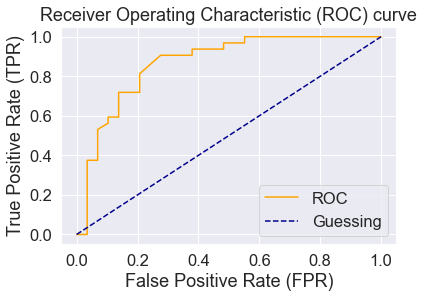

In [135]:
# create a function for plotting ROC curves:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """

    # Plot roc curve:
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Plot line with no predictive power (baseline):
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customise the plot:
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [136]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

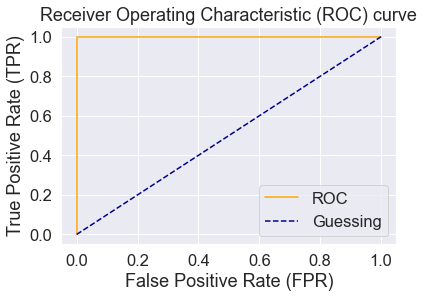

In [137]:
# Plotting perfect ROC curve and AUC score:

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [138]:
# Perfect AUC score:
roc_auc_score(y_test, y_test)

1.0

## Confusion Matrix:

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predtict.
In essence, giving you an idea of where the model is getting confused.

In [139]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [140]:
# visualise confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


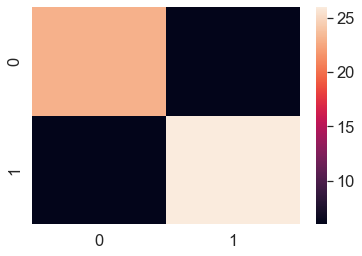

In [141]:
# make our confusion matrix more visual seaborn heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale = 1.5)

# create a confusion matrix:
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

In [142]:
# how to install a conda package into the current env using a jupyter notebook:
#
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

## Creating a Confusion Matrix using Scikit-Learn

### To use the new methods of creating a confusion matrix with scikit-learn you will need sklearn version 1.0+

In [143]:
import sklearn
sklearn.__version__

'1.1.2'

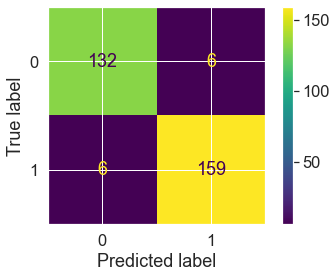

In [144]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

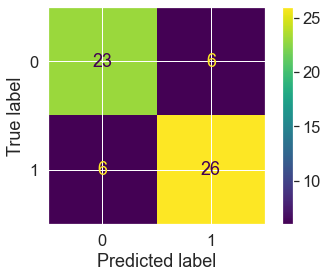

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

## Classification Report:

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [148]:
# where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)  # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds
                                   , output_dict=True))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Massive Dis balance Of Data above then Accuracy fails and we need macro_avg from classification report

## To summarise classification metrics:

* **Accuray** is a good measure to start with if all classes are balanced (eg. same amount of sample)
* **Precision** and **recall** become more important when classes are imbalanced
* If false positive predictions are worse than false negatives, aim for higher precision
* if false negative predicitons are worse than false positives, aim for higher recall
* **F1-score** is a combination of precision and recall

## 4.2.2 Regression Model Evaluation Metrics

1. R^2
2. Mean Absolute Error
3. Mean Squared Error

In [149]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8066196804802649

In [150]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [151]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [152]:
y_test.mean()

2.0550030959302275

In [153]:
from sklearn.metrics import r2_score

# fill array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [156]:
r2_score(y_true = y_test, y_pred = y_test_mean)

0.0

In [158]:
r2_score(y_true = y_test, y_pred = y_test)

1.0

## MAE

Average of the absolute differences between predictions and actual values.
it gives you an idea of how wrong your models predictions are!

In [166]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_true = y_test, y_pred = y_preds)
mae

0.3265721842781009

On average our predictions are +-0.32 of the y_test values

In [165]:
mean_squared_error(y_true = y_test, y_pred = y_preds)

0.2534073069137548

In [167]:
df = pd.DataFrame(data={'actual values': y_test,
                        "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [161]:
mean_absolute_error(y_test, y_test)

0.0

In [162]:
mean_squared_error(y_test, y_test)

0.0

In [168]:
# mae using differences and formulae:
np.abs(df["differences"]).mean()

0.32657218427810186

## MSE
 MSE is the mean of the square of the errors between actual and predicited values

In [169]:
# mean squared error

mse = mean_squared_error(y_true = y_test, y_pred = y_preds)
mse

0.2534073069137548

In [171]:
df["squared differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [172]:
# calculate mse by hand:
squared = np.square(df["differences"])
squared.mean()

0.253407306913755

In [176]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [177]:
df_large_error

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [178]:
# calculate mse with large error:

df_large_error["squared differences"].mean()

0.253407306913755

In [179]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027
